In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Cleaned_heart_cholestrol_data')

In [3]:
df.head()

,Unnamed: 0,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,63,Male,typical_angina,145,233,True,ecg_showing probable or definite left ventricu...,150,No,2.3,downsloping,0,thal_fixed_defect,0
1,1,1,67,Male,asymtomatic,160,286,False,ecg_showing probable or definite left ventricu...,108,Yes,1.5,flat,3,thal_normal,1
2,2,2,67,Male,asymtomatic,120,229,False,ecg_showing probable or definite left ventricu...,129,Yes,2.6,flat,2,thal_reversable_defect,1
3,3,3,37,Male,non-anginal pain,130,250,False,ecg_normal,187,No,3.5,downsloping,0,thal_normal,0
4,4,4,41,Female,atypical_angina,130,204,False,ecg_showing probable or definite left ventricu...,172,No,1.4,upsloping,0,thal_normal,0


In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [5]:
df.drop(columns = [ 'Unnamed: 0', 'index'], inplace = True )

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical_angina,145,233,True,ecg_showing probable or definite left ventricu...,150,No,2.3,downsloping,0,thal_fixed_defect,0
1,67,Male,asymtomatic,160,286,False,ecg_showing probable or definite left ventricu...,108,Yes,1.5,flat,3,thal_normal,1
2,67,Male,asymtomatic,120,229,False,ecg_showing probable or definite left ventricu...,129,Yes,2.6,flat,2,thal_reversable_defect,1
3,37,Male,non-anginal pain,130,250,False,ecg_normal,187,No,3.5,downsloping,0,thal_normal,0
4,41,Female,atypical_angina,130,204,False,ecg_showing probable or definite left ventricu...,172,No,1.4,upsloping,0,thal_normal,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    bool   
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 30.6+ KB


In [8]:
#!pip install yellowbrick
# Elbow Method for K means
# Import ElbowVisualizer


# Using pca and reducing the dimensions 

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
X = df[['age','trestbps', 'chol', 'thalach','oldpeak']]
X

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
292,45,110,264,132,1.2
293,68,144,193,141,3.4
294,57,130,131,115,1.2
295,57,130,236,174,0.0


In [11]:
names = X.columns
names

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [12]:
from sklearn import preprocessing

d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=names)

In [13]:
scaled_df

,age,trestbps,chol,thalach,oldpeak
0,0.197466,0.454485,0.730310,0.470156,0.007209
1,0.190612,0.455194,0.813659,0.307256,0.004267
2,0.225885,0.404571,0.772056,0.434914,0.008766
3,0.108753,0.382105,0.734817,0.549643,0.010287
4,0.136832,0.433857,0.680821,0.574026,0.004672
...,...,...,...,...,...
292,0.141424,0.345703,0.829687,0.414843,0.003771
293,0.236743,0.501339,0.671933,0.490894,0.011837
294,0.253555,0.578284,0.582732,0.511559,0.005338
295,0.174974,0.399064,0.724455,0.534132,0.000000


In [14]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_pca = pca.fit_transform(scaled_df)
  
explained_variance = pca.explained_variance_ratio_

In [15]:
X_pca

array([[ 3.34620392e-02,  4.39523190e-02],
       [-1.33883663e-01,  1.14338917e-01],
       [-3.23088882e-02,  2.60776082e-02],
       [ 5.86872805e-02, -8.23103723e-02],
       [ 1.28051695e-01, -3.73794264e-02],
       [ 6.20970397e-02, -7.00893445e-02],
       [-1.68001465e-02, -3.54024317e-03],
       [-1.56027793e-01, -8.27798943e-02],
       [-2.89294261e-02,  1.54060504e-03],
       [ 1.04180153e-01,  3.18438717e-02],
       [ 1.15507700e-01,  5.65834405e-02],
       [-7.51503588e-02, -1.04815828e-02],
       [-4.49452444e-02,  1.74862057e-03],
       [-2.79396526e-03, -8.35950199e-02],
       [ 1.55400451e-01,  9.83234292e-02],
       [ 2.40135566e-01,  4.95537067e-02],
       [ 4.46043896e-02, -8.59902502e-02],
       [ 3.66625314e-02,  3.17030985e-03],
       [-8.59448887e-02, -1.04850756e-02],
       [-2.12821641e-03, -5.37399746e-02],
       [ 3.11198392e-02, -2.04035633e-02],
       [-2.96154212e-02,  4.40828904e-03],
       [-6.40314359e-02, -5.84859436e-02],
       [ 8.

In [16]:
X

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
292,45,110,264,132,1.2
293,68,144,193,141,3.4
294,57,130,131,115,1.2
295,57,130,236,174,0.0


<IPython.core.display.Javascript object>

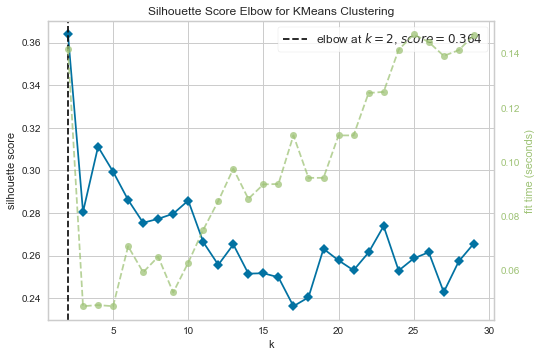

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer
kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_df)        
visualizer.show()

In [18]:
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(scaled_df)

<IPython.core.display.Javascript object>

In [19]:
label

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [20]:
model.cluster_centers_

array([[0.17532337, 0.43953569, 0.7020435 , 0.52342557, 0.00335162],
       [0.16517519, 0.38224456, 0.80707235, 0.40831963, 0.00329428]])

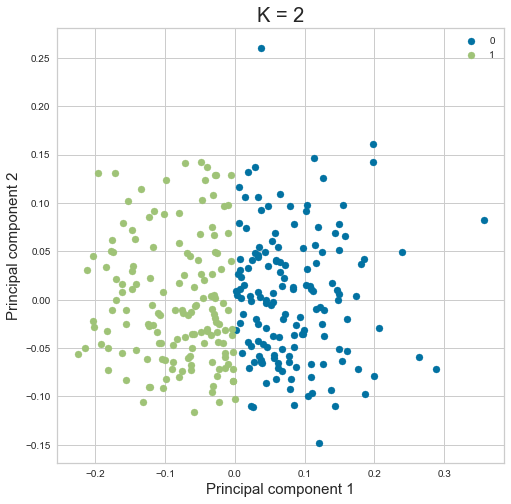

In [21]:

plt.figure(figsize=(8,8))
uniq = np.unique(label)
centers = np.array(model.cluster_centers_)
for i in uniq:
   plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)


#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 2', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()

# 3clusters

In [22]:
model3 = KMeans(n_clusters = 3, init = "k-means++")
label3 = model3.fit_predict(scaled_df)

<IPython.core.display.Javascript object>

In [23]:
label3

array([0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0])

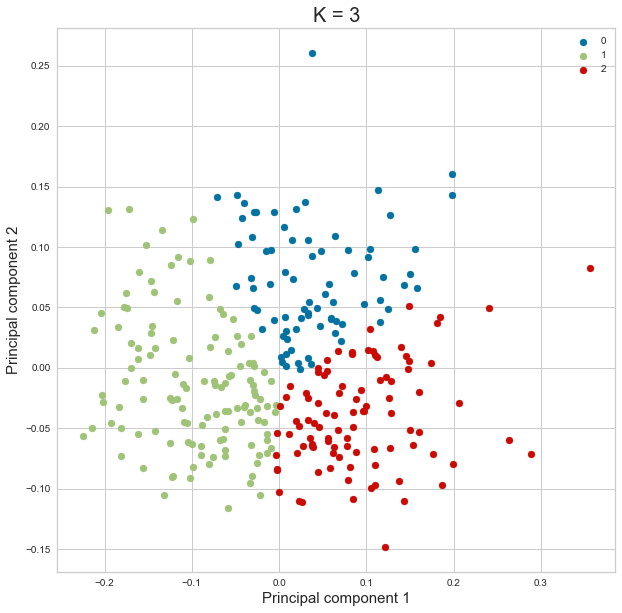

In [24]:
plt.figure(figsize=(10,10))
uniq3 = np.unique(label3)
centers3 = np.array(model3.cluster_centers_)
for i in uniq3:
   plt.scatter(X_pca[label3 == i , 0] , X_pca[label3 == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 3', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()

# 4 clusters

In [25]:
model4 = KMeans(n_clusters = 4, init = "k-means++")
label4 = model4.fit_predict(scaled_df)

<IPython.core.display.Javascript object>

In [26]:
centers4 = np.array(model4.cluster_centers_)
centers4

array([[0.16051896, 0.38007759, 0.76676318, 0.48815638, 0.00229119],
       [0.16980437, 0.44482889, 0.66847533, 0.56465084, 0.00271393],
       [0.16006475, 0.36230274, 0.83828636, 0.36705586, 0.00371066],
       [0.19708631, 0.47611443, 0.73571928, 0.43337824, 0.00517395]])

In [27]:
centers4[1]

array([0.16980437, 0.44482889, 0.66847533, 0.56465084, 0.00271393])

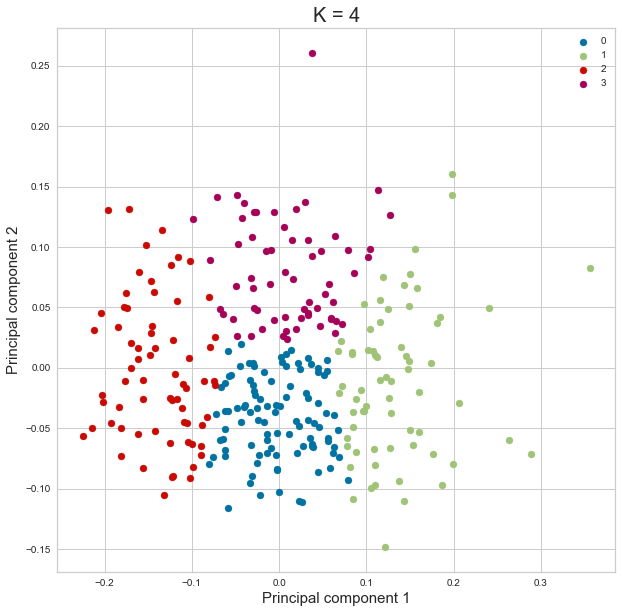

In [28]:
plt.figure(figsize=(10,10))
uniq4 = np.unique(label4)
centers4 = np.array(model4.cluster_centers_)
for i in uniq4:
   plt.scatter(X_pca[label4 == i , 0] , X_pca[label4 == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 4', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()

# 5 clusters 

In [29]:
model5 = KMeans(n_clusters = 5, init = "k-means++")
label5 = model5.fit_predict(scaled_df)

<IPython.core.display.Javascript object>

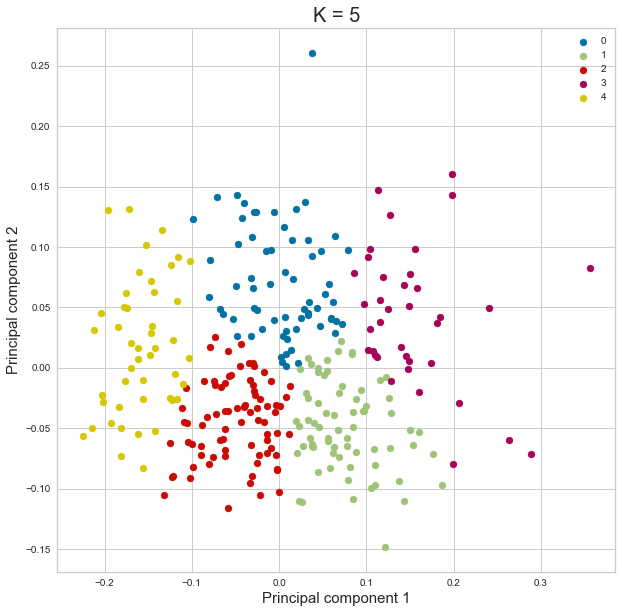

In [30]:
plt.figure(figsize=(10,10))
uniq5 = np.unique(label5)
centers5 = np.array(model5.cluster_centers_)
for i in uniq5:
   plt.scatter(X_pca[label5 == i , 0] , X_pca[label5 == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 5', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()

In [31]:
B1  = X[['age','chol']]

In [32]:
#labels added to dataset
B1['cluster'] = label
B1.head(5)


C:\Users\Sriram\AppData\Local\Temp\ipykernel_17756\851065137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B1['cluster'] = label


,age,chol,cluster
0,63,233,0
1,67,286,1
2,67,229,1
3,37,250,0
4,41,204,0


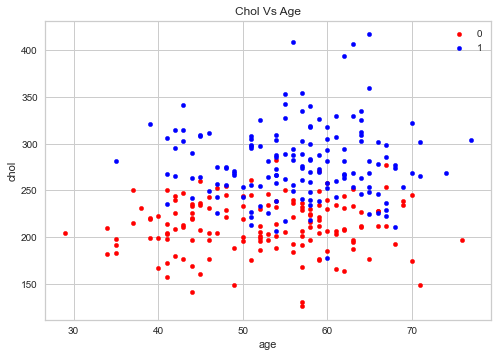

In [33]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = B1.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.title('Chol Vs Age')
plt.show()


In [34]:
A1 = df[['chol','age','target']]

In [35]:
A1.head(5)

,chol,age,target
0,233,63,0
1,286,67,1
2,229,67,1
3,250,37,0
4,204,41,0


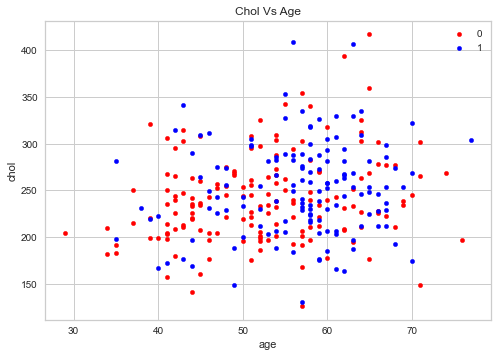

In [36]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = A1.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.title('Chol Vs Age')
plt.show()

In [37]:
y =df['target']

In [38]:
correct_label = sum(y == label)

print("Result: %d out of %d samples were correctly labeled." % (correct_label, y.size))

Result: 179 out of 297 samples were correctly labeled.


In [88]:
B2 = df[['thalach','oldpeak']]

In [91]:
A2 = df[['thalach','oldpeak','target']]

In [94]:
#labels added to dataset
B2['cluster'] = label
B2

C:\Users\Sriram\AppData\Local\Temp\ipykernel_17756\4157377328.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,thalach,oldpeak,cluster
0,150,2.3,0
1,108,1.5,1
2,129,2.6,1
3,187,3.5,0
4,172,1.4,0
...,...,...,...
292,132,1.2,1
293,141,3.4,0
294,115,1.2,0
295,174,0.0,0


In [93]:
A2

,thalach,oldpeak,target
0,150,2.3,0
1,108,1.5,1
2,129,2.6,1
3,187,3.5,0
4,172,1.4,0
...,...,...,...
292,132,1.2,1
293,141,3.4,1
294,115,1.2,1
295,174,0.0,1


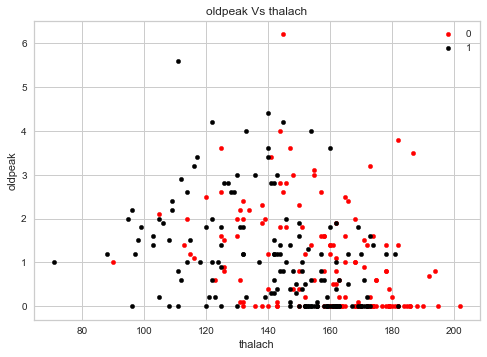

In [99]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'black'}
grouped = B2.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='thalach', y='oldpeak', label=key, color=colors[key])
plt.title('oldpeak Vs thalach')
plt.show()


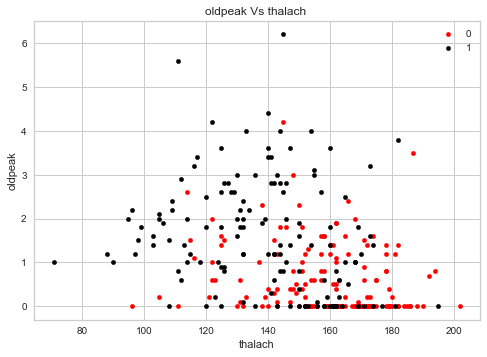

In [100]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'black'}
grouped = A2.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='thalach', y='oldpeak', label=key, color=colors[key])
plt.title('oldpeak Vs thalach ')
plt.show()

In [102]:
new_data  = df.copy()

In [104]:
#labels added to dataset
new_data['cluster'] = label
new_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,63,Male,typical_angina,145,233,True,ecg_showing probable or definite left ventricu...,150,No,2.3,downsloping,0,thal_fixed_defect,0,0
1,67,Male,asymtomatic,160,286,False,ecg_showing probable or definite left ventricu...,108,Yes,1.5,flat,3,thal_normal,1,1
2,67,Male,asymtomatic,120,229,False,ecg_showing probable or definite left ventricu...,129,Yes,2.6,flat,2,thal_reversable_defect,1,1
3,37,Male,non-anginal pain,130,250,False,ecg_normal,187,No,3.5,downsloping,0,thal_normal,0,0
4,41,Female,atypical_angina,130,204,False,ecg_showing probable or definite left ventricu...,172,No,1.4,upsloping,0,thal_normal,0,0


In [135]:
new_data['fbs'] = new_data.fbs.replace({True: ">120mg/dl", False: "<120mg/dl"})

In [136]:
new_data.groupby('cluster').mean()

,age,trestbps,chol,thalach,oldpeak,ca,target
cluster,,,,,,,
0,52.442953,132.067114,212.38255,157.738255,0.979866,0.523490,0.362416
1,56.520270,131.554054,280.27027,140.986486,1.131081,0.831081,0.567568


In [116]:
k0 = new_data[new_data['cluster'] == 0]
k0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,63,Male,typical_angina,145,233,True,ecg_showing probable or definite left ventricu...,150,No,2.3,downsloping,0,thal_fixed_defect,0,0
3,37,Male,non-anginal pain,130,250,False,ecg_normal,187,No,3.5,downsloping,0,thal_normal,0,0
4,41,Female,atypical_angina,130,204,False,ecg_showing probable or definite left ventricu...,172,No,1.4,upsloping,0,thal_normal,0,0
5,56,Male,atypical_angina,120,236,False,ecg_normal,178,No,0.8,upsloping,0,thal_normal,0,0
9,53,Male,asymtomatic,140,203,True,ecg_showing probable or definite left ventricu...,155,Yes,3.1,downsloping,0,thal_reversable_defect,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,41,Male,atypical_angina,120,157,False,ecg_normal,182,No,0.0,upsloping,0,thal_normal,0,0
290,59,Male,asymtomatic,164,176,True,ecg_showing probable or definite left ventricu...,90,No,1.0,flat,2,thal_fixed_defect,1,0
293,68,Male,asymtomatic,144,193,True,ecg_normal,141,No,3.4,flat,2,thal_reversable_defect,1,0
294,57,Male,asymtomatic,130,131,False,ecg_normal,115,Yes,1.2,flat,1,thal_reversable_defect,1,0


In [118]:
k1 = new_data[new_data['cluster'] == 1]
k1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
1,67,Male,asymtomatic,160,286,False,ecg_showing probable or definite left ventricu...,108,Yes,1.5,flat,3,thal_normal,1,1
2,67,Male,asymtomatic,120,229,False,ecg_showing probable or definite left ventricu...,129,Yes,2.6,flat,2,thal_reversable_defect,1,1
6,62,Female,asymtomatic,140,268,False,ecg_showing probable or definite left ventricu...,160,No,3.6,downsloping,2,thal_normal,1,1
7,57,Female,asymtomatic,120,354,False,ecg_normal,163,Yes,0.6,upsloping,0,thal_normal,0,1
8,63,Male,asymtomatic,130,254,False,ecg_showing probable or definite left ventricu...,147,No,1.4,flat,1,thal_reversable_defect,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,58,Male,asymtomatic,114,318,False,ecg_having ST-T wave abnormality,140,No,4.4,downsloping,3,thal_fixed_defect,1,1
285,55,Female,atypical_angina,132,342,False,ecg_normal,166,No,1.2,upsloping,0,thal_normal,0,1
291,57,Female,asymtomatic,140,241,False,ecg_normal,123,Yes,0.2,flat,0,thal_reversable_defect,1,1
292,45,Male,typical_angina,110,264,False,ecg_normal,132,No,1.2,flat,0,thal_reversable_defect,1,1


In [117]:
k0['cp'].value_counts()

asymtomatic         60
non-anginal pain    46
atypical_angina     29
typical_angina      14
Name: cp, dtype: int64

In [119]:
k1['cp'].value_counts()

asymtomatic         83
non-anginal pain    36
atypical_angina     20
typical_angina       9
Name: cp, dtype: int64

In [123]:
k0['restecg'].value_counts()

ecg_normal                                                       84
ecg_showing probable or definite left ventricular hypertrophy    63
ecg_having ST-T wave abnormality                                  2
Name: restecg, dtype: int64

In [124]:
k1['restecg'].value_counts()

ecg_showing probable or definite left ventricular hypertrophy    82
ecg_normal                                                       64
ecg_having ST-T wave abnormality                                  2
Name: restecg, dtype: int64

In [125]:
k0['slope'].value_counts()

upsloping      76
flat           62
downsloping    11
Name: slope, dtype: int64

In [127]:
k1['slope'].value_counts()

flat           75
upsloping      63
downsloping    10
Name: slope, dtype: int64

In [128]:
k0['exang'].value_counts()

No     114
Yes     35
Name: exang, dtype: int64

In [129]:
k1['exang'].value_counts()

No     85
Yes    63
Name: exang, dtype: int64

In [131]:
k0['fbs'].value_counts()

False    127
True      22
Name: fbs, dtype: int64

In [132]:
k1['fbs'].value_counts()

False    127
True      21
Name: fbs, dtype: int64

In [133]:
k0['thal'].value_counts()

thal_normal               89
thal_reversable_defect    48
thal_fixed_defect         12
Name: thal, dtype: int64

In [134]:
k1['thal'].value_counts()

thal_normal               75
thal_reversable_defect    67
thal_fixed_defect          6
Name: thal, dtype: int64

# 3D 

In [39]:
pca3 = PCA(n_components = 3)
  
X_pca3 = pca3.fit_transform(scaled_df)
  
explained_variance3 = pca3.explained_variance_ratio_

In [40]:
X_pca3

array([[ 3.34620392e-02,  4.39523190e-02,  1.12881319e-02],
       [-1.33883663e-01,  1.14338917e-01, -8.08927525e-03],
       [-3.23088882e-02,  2.60776082e-02,  5.17144960e-02],
       [ 5.86872805e-02, -8.23103723e-02, -4.15936645e-02],
       [ 1.28051695e-01, -3.73794264e-02, -3.01122062e-02],
       [ 6.20970397e-02, -7.00893445e-02,  2.25472526e-02],
       [-1.68001465e-02, -3.54024317e-03,  9.51705391e-03],
       [-1.56027793e-01, -8.27798943e-02,  4.15157108e-03],
       [-2.89294261e-02,  1.54060504e-03,  2.37960569e-02],
       [ 1.04180153e-01,  3.18438717e-02, -7.54360110e-03],
       [ 1.15507700e-01,  5.65834405e-02,  5.70107584e-03],
       [-7.51503588e-02, -1.04815828e-02, -1.07780163e-02],
       [-4.49452444e-02,  1.74862057e-03,  2.76586730e-03],
       [-2.79396526e-03, -8.35950199e-02, -1.59990247e-02],
       [ 1.55400451e-01,  9.83234292e-02, -4.49749559e-02],
       [ 2.40135566e-01,  4.95537067e-02,  1.74203489e-03],
       [ 4.46043896e-02, -8.59902502e-02

# 2clusters 3D

In [76]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Principal component 1'),yaxis = dict(title  = 'Principal component 2'),zaxis = dict(title  = 'Principal component 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("2clusters.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3clusters 3D

In [77]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Principal component 1'),yaxis = dict(title  = 'Principal component 2'),zaxis = dict(title  = 'Principal component 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model3.labels_
trace = go.Scatter3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("3clusters.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4 clusters 3D

In [78]:
Scene = dict(xaxis = dict(title  = 'Principal component 1'),yaxis = dict(title  = 'Principal component 2'),zaxis = dict(title  = 'Principal component 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model4.labels_
trace = go.Scatter3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("4clusters.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5 clusters 3D

In [79]:
Scene = dict(xaxis = dict(title  = 'Principal component 1'),yaxis = dict(title  = 'Principal component 2'),zaxis = dict(title  = 'Principal component 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model5.labels_
trace = go.Scatter3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("5clusters.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
B2 = df[['age','chol','thalach']]

In [82]:
B2['cluster'] = label
B2.head(5)


C:\Users\Sriram\AppData\Local\Temp\ipykernel_17756\984816009.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,chol,thalach,cluster
0,63,233,150,0
1,67,286,108,1
2,67,229,129,1
3,37,250,187,0
4,41,204,172,0


In [83]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'age'),yaxis = dict(title  = 'chol'),zaxis = dict(title  = 'thalach'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model3D2.labels_
trace = go.Scatter3d(x=B2.values[:, 0], y=B2.values[:, 1], z=B2.values[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("3clusters.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
A2 = df[['age','chol','thalach','target']]

In [85]:
A2.head()

,age,chol,thalach,target
0,63,233,150,0
1,67,286,108,1
2,67,229,129,1
3,37,250,187,0
4,41,204,172,0


In [86]:
Scene = dict(xaxis = dict(title  = 'age'),yaxis = dict(title  = 'chol'),zaxis = dict(title  = 'thalach'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = A2['target']
trace = go.Scatter3d(x=B2.values[:, 0], y=B2.values[:, 1], z=B2.values[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("3clusters.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
df1 = df[['chol','thalach','trestbps']]
df1

,chol,thalach,trestbps
0,233,150,145
1,286,108,160
2,229,129,120
3,250,187,130
4,204,172,130
...,...,...,...
292,264,132,110
293,193,141,144
294,131,115,130
295,236,174,130


In [58]:
from sklearn import preprocessing

d1 = preprocessing.normalize(df1)
scaled_df1 = pd.DataFrame(d1, columns=df1.columns)

In [59]:
scaled_df1

,chol,thalach,trestbps
0,0.744999,0.479613,0.463626
1,0.828864,0.312997,0.463700
2,0.792573,0.446471,0.415322
3,0.739241,0.552952,0.384405
4,0.687293,0.579483,0.437981
...,...,...,...
292,0.838116,0.419058,0.349215
293,0.691645,0.505295,0.516046
294,0.602428,0.528849,0.597829
295,0.735806,0.542501,0.405317


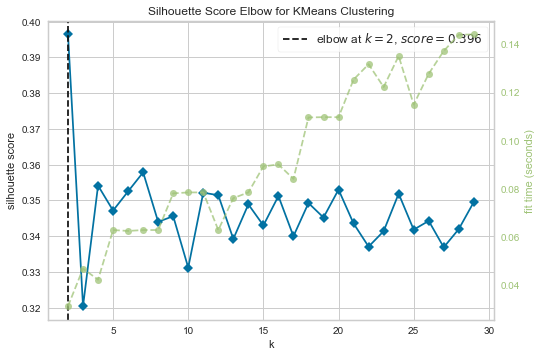

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
visualizer = KElbowVisualizer(kmeans_model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_df1)        
visualizer.show()

In [61]:
model3d = KMeans(n_clusters = 2, init = "k-means++")
label3d = model3d.fit_predict(scaled_df1)

<IPython.core.display.Javascript object>

In [62]:
correct_label3d = sum(y == label3d)

print("Result: %d out of %d samples were correctly labeled." % (correct_label3d, y.size))

Result: 116 out of 297 samples were correctly labeled.


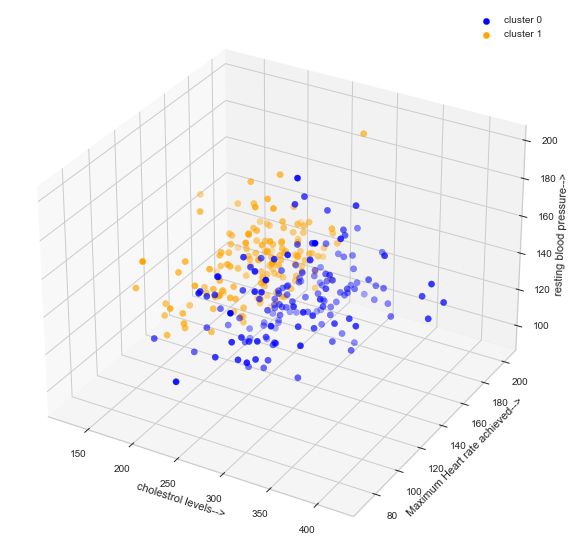

In [63]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.values[label3d == 0,0],df1.values[label3d == 0,1],df1.values[label3d == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df1.values[label3d == 1,0],df1.values[label3d == 1,1],df1.values[label3d == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.set_xlabel('cholestrol levels-->')
ax.set_ylabel('Maximum Heart rate achieved-->')
ax.set_zlabel('resting blood pressure-->')
ax.legend()
plt.show()

In [64]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'cholestrol'),yaxis = dict(title  = 'Maximum heart rate'),zaxis = dict(title  = 'Resting Blood pressure'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model3d.labels_
trace = go.Scatter3d(x=df1.values[:, 0], y=df1.values[:, 1], z=df1.values[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
df2 = df[["age",'chol','thalach']]
df2

,age,chol,thalach
0,63,233,150
1,67,286,108
2,67,229,129
3,37,250,187
4,41,204,172
...,...,...,...
292,45,264,132
293,68,193,141
294,57,131,115
295,57,236,174


In [66]:
from sklearn import preprocessing

d2 = preprocessing.normalize(df2)
scaled_df2 = pd.DataFrame(d2, columns=df2.columns)

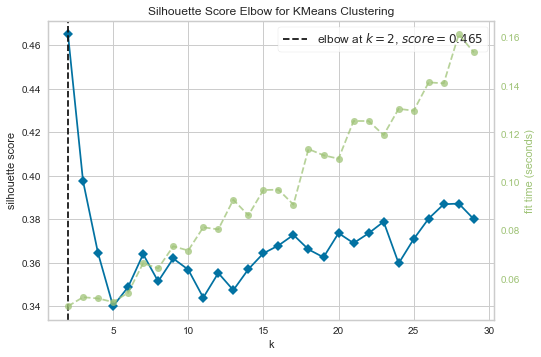

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [67]:
visualizer = KElbowVisualizer(kmeans_model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_df2)        
visualizer.show()

In [68]:
model3d2 = KMeans(n_clusters = 2, init = "k-means++")
label3d2 = model3d2.fit_predict(scaled_df2)

<IPython.core.display.Javascript object>

In [69]:
correct_label3d2 = sum(y == label3d2)

print("Result: %d out of %d samples were correctly labeled." % (correct_label3d2, y.size))

Result: 187 out of 297 samples were correctly labeled.


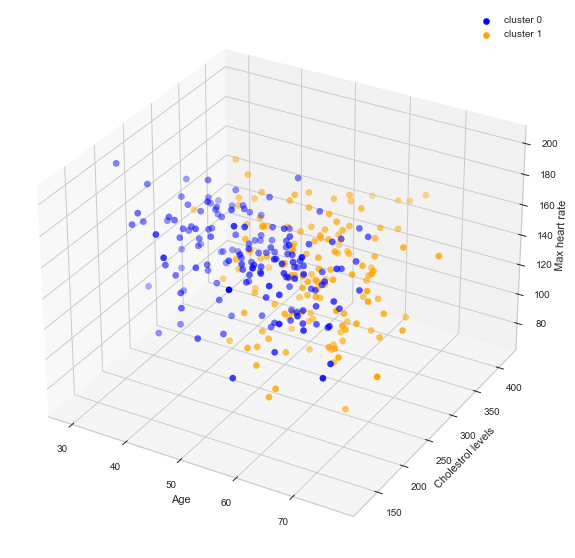

In [70]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.values[label3d2 == 0,0],df2.values[label3d2 == 0,1],df2.values[label3d2 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df2.values[label3d2 == 1,0],df2.values[label3d2 == 1,1],df2.values[label3d2 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.set_xlabel('Age')
ax.set_ylabel('Cholestrol levels')
ax.set_zlabel('Max heart rate')
ax.legend()
plt.show()

In [71]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'cholestrol'),zaxis = dict(title  = 'MAx heart rate'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model3d2.labels_
trace = go.Scatter3d(x=df2.values[:, 0], y=df2.values[:, 1], z=df2.values[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
model3d3 = KMeans(n_clusters = 3, init = "k-means++")
label3d3 = model3d3.fit_predict(df2)

<IPython.core.display.Javascript object>

In [73]:
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'cholestrol'),zaxis = dict(title  = 'MAx heart rate'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model3d3.labels_
trace = go.Scatter3d(x=df2.values[:, 0], y=df2.values[:, 1], z=df2.values[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>